## This notebook relies on the cross validation done in DataScienceV8.  Results of that cv are imported here for examination and hyperparameter selection for building the model

In [1]:
import pandas as pd
import numpy as np
from catboost import Pool, CatBoostRegressor
from sklearn.model_selection import train_test_split

In [2]:
# import the police response dataset
policeResponse = pd.read_csv('policeResponses_v1.csv', low_memory = False)
policeResponse.head()

,Unnamed: 0,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,...,COMMUNITY_COUNCIL_NEIGHBORHOOD,DISTRICT,ResponseTime,year,month,day,hour,minute,dayofweek,colorScale
0,3,QUEEN CITY AV / LAFEUILLE AV,39.131093,-84.588386,CPD,2019-03-25 09:47:54,NTR: NOTHING TO REPORT,CPD190325000428,HAZARD,HAZARD TO TRAFFIC/PEDESTRIAN,...,WESTWOOD,3.0,18.0,2019,Apr,25,9,49,Mon,11.0
1,8,51XX GLENCROSSING WY,39.130951,-84.617602,CPD,2019-03-25 16:10:14,301:OFFENSE REPORT,CPD190325001016,AUTOR,AUTO THEFT REPORT,...,WESTWOOD,3.0,2.0,2019,Apr,25,17,39,Mon,3.0
2,13,7XX CLIFTON COLONY DR,39.140487,-84.530967,CPD,2019-03-25 18:41:16,INV: INV,CPD190325001249,CRDAM,CRIMINAL DAMAGING,...,CLIFTON,5.0,5.0,2019,Apr,25,18,43,Mon,5.0
3,18,45XX KELLOGG AV,39.094499,-84.429425,CPD,2019-03-25 04:06:02,AST: ASSIST,CPD190325000170,FIREP-STILL,NaN,...,EAST END,2.0,4.0,2019,Apr,25,4,15,Mon,4.0
4,19,64XX CORBLY ST,39.092285,-84.379615,CPD,2019-03-25 18:00:22,NV:NO VIOLATION,CPD190325001204,FIGHT,LARGE GROUP ASSAULT,...,MOUNT WASHINGTON,2.0,4.0,2019,Apr,25,18,1,Mon,4.0


In [3]:
policeResponse.describe(include = 'all')

,Unnamed: 0,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,...,COMMUNITY_COUNCIL_NEIGHBORHOOD,DISTRICT,ResponseTime,year,month,day,hour,minute,dayofweek,colorScale
count,5.687170e+05,568717,568717.000000,568717.000000,568717,568717,565116,568717,568717,358696,...,566422,566417.000000,568717.000000,568717.00000,568717,568717.000000,568717.000000,568717.000000,568717,568717.000000
unique,NaN,18905,NaN,NaN,2,566952,825,568711,238,231,...,71,NaN,NaN,NaN,12,NaN,NaN,NaN,7,NaN
top,NaN,35XX READING RD,NaN,NaN,CPD,2018-03-05 17:00:00,INV: INV,CPD180102001529,FAMTRB,DISORDERLY PERSON(S),...,WESTWOOD,NaN,NaN,NaN,Nov,NaN,NaN,NaN,Sat,NaN
freq,NaN,2321,NaN,NaN,318972,3,69488,2,52213,25205,...,48104,NaN,NaN,NaN,53535,NaN,NaN,NaN,83948,NaN
mean,1.485264e+06,NaN,39.140336,-84.517678,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.153412,9.969247,2016.66676,NaN,15.695951,13.263634,29.487965,NaN,6.826655
std,6.126205e+05,NaN,0.030938,0.055576,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.314562,14.702786,1.31928,NaN,8.792005,6.668185,17.222324,NaN,3.227998
min,3.000000e+00,NaN,38.963898,-84.817629,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,1.000000,2014.00000,NaN,1.000000,0.000000,0.000000,NaN,3.000000
25%,9.575470e+05,NaN,39.114963,-84.560751,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.000000,3.000000,2016.00000,NaN,8.000000,9.000000,15.000000,NaN,3.000000
50%,1.485179e+06,NaN,39.135820,-84.516604,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.000000,6.000000,2017.00000,NaN,16.000000,14.000000,30.000000,NaN,6.000000
75%,2.015055e+06,NaN,39.158432,-84.485764,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.000000,11.000000,2018.00000,NaN,23.000000,19.000000,44.000000,NaN,11.000000


In [4]:
policeResponse.dtypes

Unnamed: 0                          int64
ADDRESS_X                          object
LATITUDE_X                        float64
LONGITUDE_X                       float64
AGENCY                             object
CREATE_TIME_INCIDENT               object
DISPOSITION_TEXT                   object
EVENT_NUMBER                       object
INCIDENT_TYPE_ID                   object
INCIDENT_TYPE_DESC                 object
NEIGHBORHOOD                      float64
PRIORITY                          float64
PRIORITY_COLOR                     object
ARRIVAL_TIME_PRIMARY_UNIT          object
CLOSED_TIME_INCIDENT               object
DISPATCH_TIME_PRIMARY_UNIT         object
BEAT                               object
COMMUNITY_COUNCIL_NEIGHBORHOOD     object
DISTRICT                          float64
ResponseTime                      float64
year                                int64
month                              object
day                                 int64
hour                              

In [6]:
#Drop the NA Labels - will need to reexamine these in the future
policeResponse = policeResponse.dropna(subset = ['ResponseTime'])

#Drop the SDET as well - we are fairly certain that is police responding while off duty
#policeResponse = policeResponse.drop(policeResponse[policeResponse.INCIDENT_TYPE_ID == 'SDET'].index)

labels = policeResponse['ResponseTime']
features = pd.DataFrame({
    'Latitude': policeResponse['LATITUDE_X'],
    'Longitude': policeResponse['LONGITUDE_X'],
    'Agency' : policeResponse['AGENCY'],
    'Priority' : policeResponse['PRIORITY'],
    'month': policeResponse['month'],
    'day': policeResponse['day'],
    'hour': policeResponse['hour'],
    'dayofweek': policeResponse['dayofweek'],
    'year': policeResponse['year'],
    'Agency': policeResponse['AGENCY'],
    'Incident Type': policeResponse['INCIDENT_TYPE_ID'],
    'Neighborhood': policeResponse['COMMUNITY_COUNCIL_NEIGHBORHOOD'],
    'Priority Color': policeResponse['PRIORITY_COLOR'],
    'Beat':policeResponse['BEAT']    
})


features.fillna('N/A', inplace = True)
features.head()

,Latitude,Longitude,Agency,Priority,month,day,hour,dayofweek,year,Incident Type,Neighborhood,Priority Color,Beat
0,39.131093,-84.588386,CPD,18,Apr,25,9,Mon,2019,HAZARD,WESTWOOD,BLUE,P331
1,39.130951,-84.617602,CPD,32,Apr,25,17,Mon,2019,AUTOR,WESTWOOD,PURPLE,P331
2,39.140487,-84.530967,CPD,26,Apr,25,18,Mon,2019,CRDAM,CLIFTON,PURPLE,P521
3,39.094499,-84.429425,CPD,5,Apr,25,4,Mon,2019,FIREP-STILL,EAST END,N/A,P241
4,39.092285,-84.379615,CPD,3,Apr,25,18,Mon,2019,FIGHT,MOUNT WASHINGTON,YELLOW,P241


In [7]:
x_train, x_test, y_train, y_test = train_test_split(features,labels, test_size = 0.25,random_state = 42)

In [8]:
x_test.head()

,Latitude,Longitude,Agency,Priority,month,day,hour,dayofweek,year,Incident Type,Neighborhood,Priority Color,Beat
237716,39.165215,-84.477690,CP,N/A,Dec,3,12,Mon,2014,BE,PADDOCK HILLS,N/A,P446
225961,39.145453,-84.490483,CPD,12,12,6,1,Wed,2017,SUSP,AVONDALE,BLUE,P431
437449,39.130888,-84.490196,CP,N/A,Mar,9,1,Tue,2016,MHRTV,WALNUT HILLS,N/A,P425
273360,39.145938,-84.493524,CP,N/A,Sep,31,16,Wed,2016,BE,AVONDALE,N/A,P434
304758,39.189823,-84.511907,CP,N/A,Apr,26,3,Thu,2015,ASSLT,WINTON HILLS,N/A,P537


In [9]:
train_pool = Pool(x_train, y_train, cat_features=[2,3,4,7,8,9,10,11,12])
test_pool = Pool(x_test, y_test, cat_features=[2,3,4,7,8,9,10,11,12])

In [10]:
hyperParameters = pd.read_csv('results/hyperParameters.csv')
cv_scores = pd.read_csv('results/cv_scores.csv')

In [11]:
bestOverallScore = cv_scores.loc[cv_scores['test-MAE-mean'] == cv_scores['test-MAE-mean'].min()].reset_index()
bestIteration = bestOverallScore.at[0,'iteration']
bestOverallScore.head()

,index,Unnamed: 0,test-MAE-mean,test-MAE-std,train-MAE-mean,train-MAE-std,iteration
0,31327,31327,6.026423,0.06136,5.955976,0.006152,35


In [12]:
print(bestIteration)
bestCV = cv_scores.loc[cv_scores['iteration'] == bestIteration]
bestCV.to_csv('results/bestCV.csv')
bestCV.tail()


35


,Unnamed: 0,test-MAE-mean,test-MAE-std,train-MAE-mean,train-MAE-std,iteration
31323,31323,6.026482,0.061364,5.956300,0.006139,35
31324,31324,6.026478,0.061360,5.956222,0.006157,35
31325,31325,6.026465,0.061357,5.956129,0.006156,35
31326,31326,6.026441,0.061357,5.956039,0.006159,35
31327,31327,6.026423,0.061360,5.955976,0.006152,35


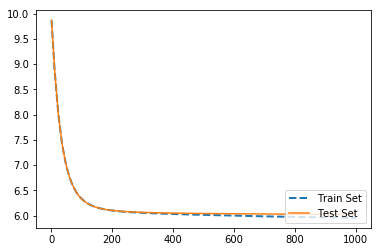

In [14]:
import matplotlib.pyplot as plt

y1 = bestCV['train-MAE-mean']
y2 = bestCV['test-MAE-mean']
x = np.arange(1,1001,1)

fig, ax = plt.subplots()

line1, = ax.plot(x, y1, '--', linewidth=2,
                 label='Train Set')

line2, = ax.plot(x, y2, 
                 label='Test Set')

ax.legend(loc='lower right')
plt.show()

In [16]:
bestHyperParams = hyperParameters.loc[hyperParameters['iteration']==bestIteration].reset_index()

params_space = {'iterations': 1000,
                'learning_rate': bestHyperParams.at[0,'learning_rate'],
                'loss_function': 'MAE',
                'max_depth': bestHyperParams.at[0,'max_depth'],
                'random_seed': 42,
                'bootstrap_type': 'Bayesian',
                #'rsm': bestHyperParams.at[0,'rsm'],
                'bagging_temperature': bestHyperParams.at[0,'bagging_temperature'],
                'random_strength': bestHyperParams.at[0,'random_strength'],
                'task_type':'GPU'
                
               }
print(params_space)

{'iterations': 1000, 'learning_rate': 0.1985339952844135, 'loss_function': 'MAE', 'max_depth': 10.0, 'random_seed': 42, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.025450756467009672, 'random_strength': 1.5110937913506746, 'task_type': 'GPU'}


In [17]:
model = CatBoostRegressor(**params_space)

In [18]:
import time

startTime = time.time()
#train the model
model.fit(train_pool)

print("Total Training Time: %.2f minutes" % ((time.time() - startTime)/60))

0:	learn: 9.8670526	total: 91.2ms	remaining: 1m 31s
1:	learn: 9.7678742	total: 177ms	remaining: 1m 28s
2:	learn: 9.6686899	total: 300ms	remaining: 1m 39s
3:	learn: 9.5693879	total: 345ms	remaining: 1m 25s
4:	learn: 9.4701069	total: 418ms	remaining: 1m 23s
5:	learn: 9.3709033	total: 505ms	remaining: 1m 23s
6:	learn: 9.2716482	total: 598ms	remaining: 1m 24s
7:	learn: 9.1724311	total: 685ms	remaining: 1m 24s
8:	learn: 9.0731953	total: 782ms	remaining: 1m 26s
9:	learn: 8.9739571	total: 890ms	remaining: 1m 28s
10:	learn: 8.8875895	total: 999ms	remaining: 1m 29s
11:	learn: 8.8138344	total: 1.13s	remaining: 1m 32s
12:	learn: 8.7401726	total: 1.25s	remaining: 1m 35s
13:	learn: 8.6663056	total: 1.32s	remaining: 1m 33s
14:	learn: 8.5924556	total: 1.42s	remaining: 1m 33s
15:	learn: 8.5185799	total: 1.51s	remaining: 1m 32s
16:	learn: 8.4448371	total: 1.61s	remaining: 1m 33s
17:	learn: 8.3710540	total: 1.71s	remaining: 1m 33s
18:	learn: 8.2972028	total: 1.8s	remaining: 1m 33s
19:	learn: 8.2235650	t

159:	learn: 6.1450255	total: 18.1s	remaining: 1m 34s
160:	learn: 6.1435667	total: 18.2s	remaining: 1m 34s
161:	learn: 6.1421149	total: 18.3s	remaining: 1m 34s
162:	learn: 6.1406801	total: 18.4s	remaining: 1m 34s
163:	learn: 6.1392746	total: 18.5s	remaining: 1m 34s
164:	learn: 6.1378943	total: 18.6s	remaining: 1m 34s
165:	learn: 6.1365222	total: 18.8s	remaining: 1m 34s
166:	learn: 6.1352063	total: 18.9s	remaining: 1m 34s
167:	learn: 6.1339280	total: 19s	remaining: 1m 34s
168:	learn: 6.1326661	total: 19.1s	remaining: 1m 33s
169:	learn: 6.1314101	total: 19.2s	remaining: 1m 33s
170:	learn: 6.1301956	total: 19.3s	remaining: 1m 33s
171:	learn: 6.1289753	total: 19.4s	remaining: 1m 33s
172:	learn: 6.1278113	total: 19.6s	remaining: 1m 33s
173:	learn: 6.1266783	total: 19.7s	remaining: 1m 33s
174:	learn: 6.1255477	total: 19.8s	remaining: 1m 33s
175:	learn: 6.1244962	total: 19.9s	remaining: 1m 33s
176:	learn: 6.1233785	total: 20s	remaining: 1m 32s
177:	learn: 6.1223053	total: 20.1s	remaining: 1m 3

315:	learn: 6.0535299	total: 37.1s	remaining: 1m 20s
316:	learn: 6.0533101	total: 37.2s	remaining: 1m 20s
317:	learn: 6.0530892	total: 37.3s	remaining: 1m 20s
318:	learn: 6.0527850	total: 37.5s	remaining: 1m 19s
319:	learn: 6.0525007	total: 37.6s	remaining: 1m 19s
320:	learn: 6.0522030	total: 37.7s	remaining: 1m 19s
321:	learn: 6.0519574	total: 37.8s	remaining: 1m 19s
322:	learn: 6.0517188	total: 37.9s	remaining: 1m 19s
323:	learn: 6.0515114	total: 38.1s	remaining: 1m 19s
324:	learn: 6.0512945	total: 38.2s	remaining: 1m 19s
325:	learn: 6.0510946	total: 38.3s	remaining: 1m 19s
326:	learn: 6.0508549	total: 38.4s	remaining: 1m 19s
327:	learn: 6.0505871	total: 38.5s	remaining: 1m 18s
328:	learn: 6.0503221	total: 38.7s	remaining: 1m 18s
329:	learn: 6.0501258	total: 38.8s	remaining: 1m 18s
330:	learn: 6.0498321	total: 38.9s	remaining: 1m 18s
331:	learn: 6.0495660	total: 39.1s	remaining: 1m 18s
332:	learn: 6.0493058	total: 39.2s	remaining: 1m 18s
333:	learn: 6.0490632	total: 39.3s	remaining: 

472:	learn: 6.0227888	total: 56.3s	remaining: 1m 2s
473:	learn: 6.0226862	total: 56.4s	remaining: 1m 2s
474:	learn: 6.0224781	total: 56.5s	remaining: 1m 2s
475:	learn: 6.0223556	total: 56.6s	remaining: 1m 2s
476:	learn: 6.0221845	total: 56.7s	remaining: 1m 2s
477:	learn: 6.0220268	total: 56.9s	remaining: 1m 2s
478:	learn: 6.0218885	total: 57s	remaining: 1m 2s
479:	learn: 6.0216517	total: 57.1s	remaining: 1m 1s
480:	learn: 6.0214893	total: 57.3s	remaining: 1m 1s
481:	learn: 6.0213147	total: 57.5s	remaining: 1m 1s
482:	learn: 6.0211254	total: 57.6s	remaining: 1m 1s
483:	learn: 6.0209390	total: 57.7s	remaining: 1m 1s
484:	learn: 6.0208177	total: 57.8s	remaining: 1m 1s
485:	learn: 6.0206037	total: 57.9s	remaining: 1m 1s
486:	learn: 6.0204080	total: 58.1s	remaining: 1m 1s
487:	learn: 6.0202614	total: 58.2s	remaining: 1m 1s
488:	learn: 6.0200909	total: 58.3s	remaining: 1m
489:	learn: 6.0199385	total: 58.5s	remaining: 1m
490:	learn: 6.0198142	total: 58.6s	remaining: 1m
491:	learn: 6.0196249	t

632:	learn: 5.9989092	total: 1m 15s	remaining: 44s
633:	learn: 5.9987803	total: 1m 16s	remaining: 43.9s
634:	learn: 5.9986549	total: 1m 16s	remaining: 43.8s
635:	learn: 5.9985107	total: 1m 16s	remaining: 43.7s
636:	learn: 5.9983718	total: 1m 16s	remaining: 43.5s
637:	learn: 5.9982704	total: 1m 16s	remaining: 43.4s
638:	learn: 5.9981672	total: 1m 16s	remaining: 43.3s
639:	learn: 5.9980904	total: 1m 16s	remaining: 43.2s
640:	learn: 5.9979867	total: 1m 16s	remaining: 43.1s
641:	learn: 5.9978701	total: 1m 17s	remaining: 43s
642:	learn: 5.9977540	total: 1m 17s	remaining: 42.8s
643:	learn: 5.9976210	total: 1m 17s	remaining: 42.7s
644:	learn: 5.9974967	total: 1m 17s	remaining: 42.6s
645:	learn: 5.9973584	total: 1m 17s	remaining: 42.5s
646:	learn: 5.9972494	total: 1m 17s	remaining: 42.4s
647:	learn: 5.9971304	total: 1m 17s	remaining: 42.2s
648:	learn: 5.9970014	total: 1m 17s	remaining: 42.1s
649:	learn: 5.9969065	total: 1m 18s	remaining: 42s
650:	learn: 5.9967910	total: 1m 18s	remaining: 41.9s

789:	learn: 5.9807801	total: 1m 34s	remaining: 25.2s
790:	learn: 5.9807279	total: 1m 35s	remaining: 25.1s
791:	learn: 5.9806447	total: 1m 35s	remaining: 25s
792:	learn: 5.9806078	total: 1m 35s	remaining: 24.9s
793:	learn: 5.9805457	total: 1m 35s	remaining: 24.7s
794:	learn: 5.9804173	total: 1m 35s	remaining: 24.6s
795:	learn: 5.9802544	total: 1m 35s	remaining: 24.5s
796:	learn: 5.9801711	total: 1m 35s	remaining: 24.3s
797:	learn: 5.9800691	total: 1m 35s	remaining: 24.2s
798:	learn: 5.9800094	total: 1m 35s	remaining: 24.1s
799:	learn: 5.9799513	total: 1m 35s	remaining: 24s
800:	learn: 5.9799209	total: 1m 36s	remaining: 23.9s
801:	learn: 5.9798101	total: 1m 36s	remaining: 23.7s
802:	learn: 5.9797351	total: 1m 36s	remaining: 23.6s
803:	learn: 5.9796319	total: 1m 36s	remaining: 23.5s
804:	learn: 5.9795153	total: 1m 36s	remaining: 23.4s
805:	learn: 5.9794438	total: 1m 36s	remaining: 23.2s
806:	learn: 5.9792949	total: 1m 36s	remaining: 23.1s
807:	learn: 5.9791665	total: 1m 36s	remaining: 23s

945:	learn: 5.9668083	total: 1m 52s	remaining: 6.4s
946:	learn: 5.9667397	total: 1m 52s	remaining: 6.29s
947:	learn: 5.9666295	total: 1m 52s	remaining: 6.17s
948:	learn: 5.9665199	total: 1m 52s	remaining: 6.05s
949:	learn: 5.9664589	total: 1m 52s	remaining: 5.93s
950:	learn: 5.9663997	total: 1m 52s	remaining: 5.81s
951:	learn: 5.9663142	total: 1m 52s	remaining: 5.69s
952:	learn: 5.9662386	total: 1m 52s	remaining: 5.57s
953:	learn: 5.9661454	total: 1m 53s	remaining: 5.45s
954:	learn: 5.9660985	total: 1m 53s	remaining: 5.33s
955:	learn: 5.9660416	total: 1m 53s	remaining: 5.21s
956:	learn: 5.9659772	total: 1m 53s	remaining: 5.09s
957:	learn: 5.9659033	total: 1m 53s	remaining: 4.98s
958:	learn: 5.9658336	total: 1m 53s	remaining: 4.86s
959:	learn: 5.9657990	total: 1m 53s	remaining: 4.74s
960:	learn: 5.9657093	total: 1m 53s	remaining: 4.62s
961:	learn: 5.9656407	total: 1m 53s	remaining: 4.5s
962:	learn: 5.9655856	total: 1m 54s	remaining: 4.38s
963:	learn: 5.9654620	total: 1m 54s	remaining: 4

In [19]:
print(pd.DataFrame(model.eval_metrics(train_pool, metrics = ['RMSE','MAE'])))

          RMSE       MAE
0    17.607364  9.867102
1    17.551947  9.767884
2    17.496925  9.668662
3    17.442268  9.569397
4    17.388007  9.470133
5    17.334147  9.370879
6    17.280705  9.271651
7    17.227657  9.172405
8    17.175032  9.073177
9    17.122809  8.973927
10   17.071002  8.887561
11   17.025818  8.813928
12   16.980792  8.739933
13   16.936001  8.665913
14   16.891440  8.591892
15   16.847226  8.517907
16   16.803363  8.444068
17   16.760092  8.370387
18   16.716843  8.296425
19   16.674102  8.222451
20   16.631636  8.148657
21   16.590771  8.081816
22   16.553717  8.025233
23   16.518104  7.972845
24   16.483243  7.922564
25   16.448585  7.873147
26   16.414573  7.824446
27   16.380704  7.775543
28   16.346978  7.726686
29   16.313695  7.678105
..         ...       ...
970  14.432891  5.955787
971  14.432832  5.955727
972  14.432834  5.955720
973  14.432803  5.955704
974  14.432724  5.955607
975  14.432656  5.955527
976  14.432639  5.955516
977  14.432635  5.955511


#### Run the model on the test set of data

In [20]:

test_validate = model.predict(test_pool)
print(test_validate)

[ 4.82112922  3.26228837  4.08532924 ...  5.96957315  5.93008456
 10.13893592]


In [21]:
y_test.describe()

count    142180.000000
mean          9.977922
std          15.056851
min           1.000000
25%           3.000000
50%           6.000000
75%          11.000000
max        1634.000000
Name: ResponseTime, dtype: float64

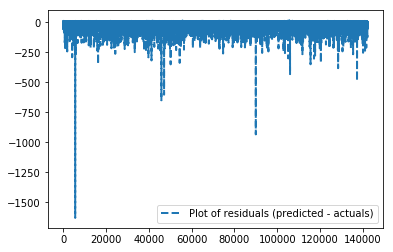

In [26]:
import matplotlib.pyplot as plt

y1 = test_validate - y_test
#y2 = test_validate
x = np.arange(1,len(y_test)+1,1)

fig, ax = plt.subplots()

line1, = ax.plot(x, y1, '--', linewidth=2, 
                 label='Plot of residuals (predicted - actuals)')

#line2, = ax.plot(x, y2, 
#                 label='Dashes set proactively')

ax.legend(loc='lower right')
plt.show()

(0, 40)

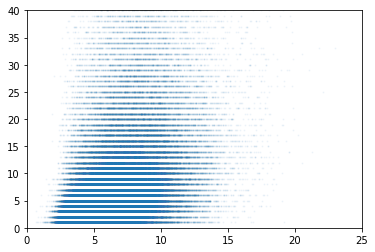

In [58]:
plt.scatter(test_validate, y_test, s = 1,alpha = 0.05)
plt.xlim(0,25)
plt.ylim(0,40)

In [27]:
residuals = test_validate - y_test
residuals.describe()

count    142180.000000
mean         -3.131708
std          14.611478
min       -1629.211487
25%          -4.115678
50%           0.009762
75%           2.482630
max          18.191259
Name: ResponseTime, dtype: float64

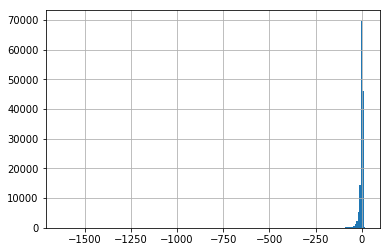

In [28]:
residuals.hist(bins = 200)

In [60]:
pd.DataFrame({'Predicted': test_validate,
             'Actual': y_test}).to_csv('residualData.csv')

In [29]:
#Compute median absolute error
np.median(np.absolute(residuals))

2.999525963963606

In [30]:
np.absolute(residuals).describe()

count    142180.000000
mean          6.039606
std          13.668425
min           0.000017
25%           1.388797
50%           2.999526
75%           5.815653
max        1629.211487
Name: ResponseTime, dtype: float64

In [31]:
print(model.score(test_pool))

14.943272087183466


In [32]:
model.get_feature_importance(test_pool)

[9.05471686735397,
 10.003333272568346,
 1.019404855489881,
 3.438263416017398,
 3.556850063336977,
 1.1476123729591048,
 21.448380068932185,
 3.879998051312341,
 4.960266723447427,
 19.86505506664633,
 10.204528085761927,
 2.0069134035109975,
 9.41467775266311]

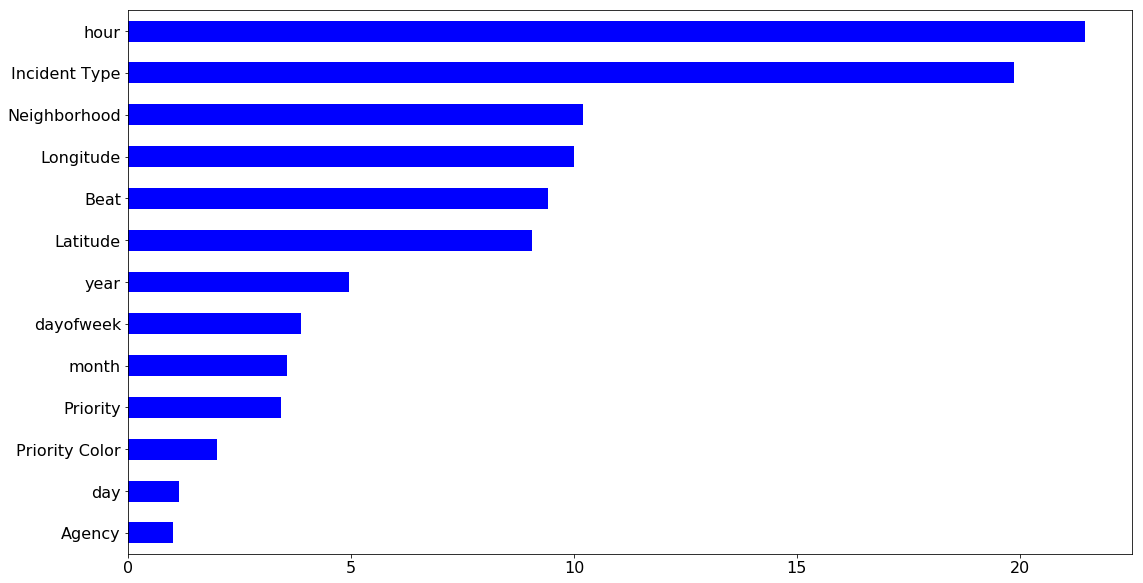

In [33]:
import pickle
featureImportance = pd.Series(model.get_feature_importance(test_pool), index = list(features.columns.values)).sort_values()
featureImportance.to_pickle('results/featureImportanceV2.pkl')
featureImportance.plot(kind='barh', figsize=(18, 10), fontsize=16, color='b')

In [34]:
import catboost
interactions = model.get_feature_importance(test_pool, fstr_type=catboost.EFstrType.Interaction, prettified=True)


feature_interaction = [[x_test.columns[interaction[0]], x_test.columns[interaction[1]], interaction[2]] for interaction in interactions]
feature_interaction_df = pd.DataFrame(feature_interaction, columns=['feature1', 'feature2', 'interaction_strength'])
#feature_interaction_df.head(20).to_pickle('results/featureInteractionV1.pkl')
feature_interaction_df.head(20)


,feature1,feature2,interaction_strength
0,hour,Incident Type,7.235732
1,Latitude,Longitude,5.043249
2,Longitude,hour,4.136855
3,Latitude,hour,3.924645
4,hour,Neighborhood,3.655372
5,Incident Type,Neighborhood,3.284151
6,hour,Beat,3.235051
7,Priority,Incident Type,3.117303
8,Longitude,Incident Type,2.828545
9,Latitude,Incident Type,2.827606


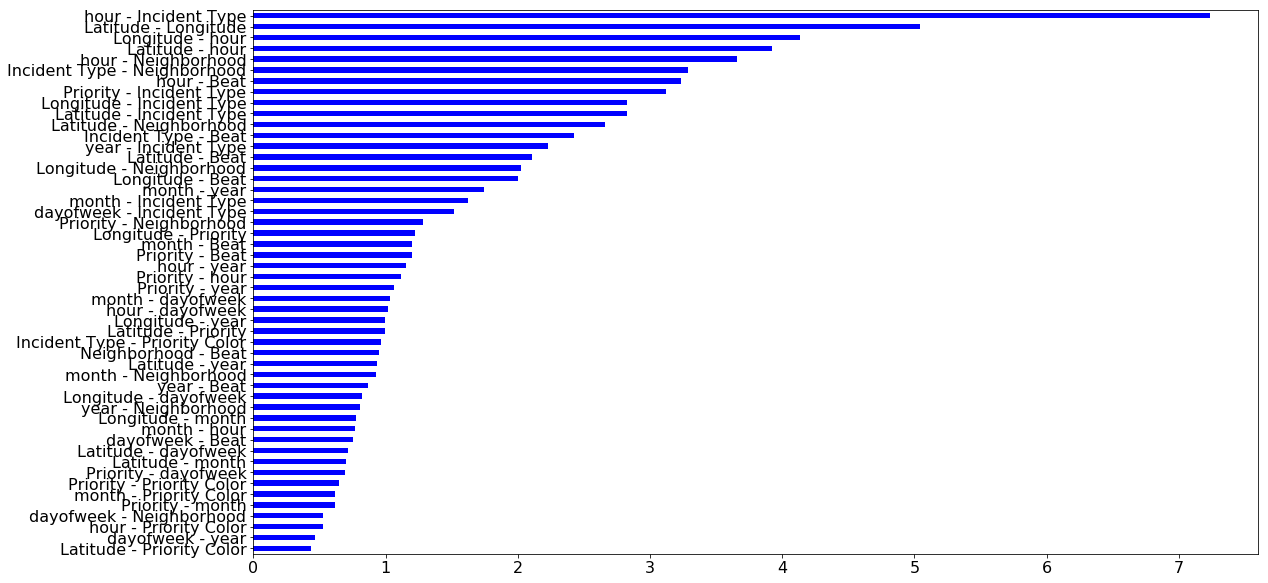

In [35]:
featureInteractionSeries = pd.Series(index=zip(feature_interaction_df['feature1'], feature_interaction_df['feature2']), \
          data=feature_interaction_df['interaction_strength'].values, \
          name='interaction_strength').head(50).sort_values()
featureInteractionSeries.index = [' - '.join(item) for item in featureInteractionSeries.index]

featureInteractionSeries.to_pickle('results/featureInteractionV2.pkl')
featureInteractionSeries.plot(kind='barh', figsize=(18, 10), fontsize=16, color='b')


# Begin to export more data for visualizations.  We need to have a single dataframe with all the y_test features, labels, and predicts

In [36]:
catBoostTable = x_test.copy()
catBoostTable.head()

,Latitude,Longitude,Agency,Priority,month,day,hour,dayofweek,year,Incident Type,Neighborhood,Priority Color,Beat
237716,39.165215,-84.477690,CP,N/A,Dec,3,12,Mon,2014,BE,PADDOCK HILLS,N/A,P446
225961,39.145453,-84.490483,CPD,12,12,6,1,Wed,2017,SUSP,AVONDALE,BLUE,P431
437449,39.130888,-84.490196,CP,N/A,Mar,9,1,Tue,2016,MHRTV,WALNUT HILLS,N/A,P425
273360,39.145938,-84.493524,CP,N/A,Sep,31,16,Wed,2016,BE,AVONDALE,N/A,P434
304758,39.189823,-84.511907,CP,N/A,Apr,26,3,Thu,2015,ASSLT,WINTON HILLS,N/A,P537


In [37]:
catBoostTable['ActualResponseTime'] = y_test
catBoostTable = catBoostTable.reset_index()
catBoostTable['PredictedResponseTime'] = test_validate
catBoostTable['Residuals'] = catBoostTable['PredictedResponseTime'] - catBoostTable['ActualResponseTime']
catBoostTable.head()

,index,Latitude,Longitude,Agency,Priority,month,day,hour,dayofweek,year,Incident Type,Neighborhood,Priority Color,Beat,ActualResponseTime,PredictedResponseTime,Residuals
0,237716,39.165215,-84.477690,CP,N/A,Dec,3,12,Mon,2014,BE,PADDOCK HILLS,N/A,P446,3.0,4.821129,1.821129
1,225961,39.145453,-84.490483,CPD,12,12,6,1,Wed,2017,SUSP,AVONDALE,BLUE,P431,2.0,3.262288,1.262288
2,437449,39.130888,-84.490196,CP,N/A,Mar,9,1,Tue,2016,MHRTV,WALNUT HILLS,N/A,P425,8.0,4.085329,-3.914671
3,273360,39.145938,-84.493524,CP,N/A,Sep,31,16,Wed,2016,BE,AVONDALE,N/A,P434,8.0,3.948899,-4.051101
4,304758,39.189823,-84.511907,CP,N/A,Apr,26,3,Thu,2015,ASSLT,WINTON HILLS,N/A,P537,6.0,5.915937,-0.084063


## Create a column for color:  Essentially cut everything 1.5 IQR above and Below the residuals (Q1 - 1.5IQR and Q3 + 1.5IQR

In [38]:
from scipy import stats
IQR = stats.iqr(catBoostTable['Residuals'])
catBoostTable['color']  = catBoostTable['Residuals'].copy()
lowerBound = np.percentile(catBoostTable['color'], 25) - 1.5 * IQR
upperBound = np.percentile(catBoostTable['color'], 75) + 1.5 * IQR
print(lowerBound, upperBound)


-14.013139438601073 12.380091302581874


In [39]:
# Cap the limits of the color array at the outliers

catBoostTable.loc[catBoostTable['color']>upperBound,'color'] = upperBound
catBoostTable.loc[catBoostTable['color']<lowerBound,'color'] = lowerBound
catBoostTable.describe(include = 'all')

,index,Latitude,Longitude,Agency,Priority,month,day,hour,dayofweek,year,Incident Type,Neighborhood,Priority Color,Beat,ActualResponseTime,PredictedResponseTime,Residuals,color
count,142180.000000,142180.000000,142180.000000,142180,142180,142180,142180.000000,142180.000000,142180,142180.000000,142180,142180,142180,142180,142180.000000,142180.000000,142180.000000,142180.000000
unique,NaN,NaN,NaN,2,35,12,NaN,NaN,7,NaN,197,71,5,158,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,CPD,N/A,Nov,NaN,NaN,Sat,NaN,FAMTRB,WESTWOOD,N/A,P321,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,79787,35537,13283,NaN,NaN,20859,NaN,13111,12011,79411,8864,NaN,NaN,NaN,NaN
mean,284586.800661,39.140327,-84.517889,NaN,NaN,NaN,15.696258,13.262984,NaN,2016.668146,NaN,NaN,NaN,NaN,9.977922,6.846215,-3.131708,-1.456253
std,164073.631342,0.030964,0.055576,NaN,NaN,NaN,8.782933,6.663037,NaN,1.320166,NaN,NaN,NaN,NaN,15.056851,2.542261,14.611478,5.778331
min,2.000000,39.014364,-84.817629,NaN,NaN,NaN,1.000000,0.000000,NaN,2014.000000,NaN,NaN,NaN,NaN,1.000000,0.644086,-1629.211487,-14.013139
25%,142964.750000,39.114901,-84.560835,NaN,NaN,NaN,8.000000,9.000000,NaN,2016.000000,NaN,NaN,NaN,NaN,3.000000,4.954151,-4.115678,-4.115678
50%,285068.000000,39.135743,-84.516812,NaN,NaN,NaN,16.000000,14.000000,NaN,2017.000000,NaN,NaN,NaN,NaN,6.000000,6.528345,0.009762,0.009762
75%,426236.000000,39.158550,-84.485896,NaN,NaN,NaN,23.000000,19.000000,NaN,2018.000000,NaN,NaN,NaN,NaN,11.000000,8.425931,2.482630,2.482630


In [40]:
#Lets make a color scheme for both actual response times and predicted response times
catBoostTable['colorActualResponseTimes'] = catBoostTable['ActualResponseTime'].copy()
catBoostTable.loc[catBoostTable['colorActualResponseTimes']>np.percentile(catBoostTable['colorActualResponseTimes'], 75)\
                  + 1.5 * IQR,'colorActualResponseTimes'] = np.percentile(catBoostTable['colorActualResponseTimes'], 75)\
                    + 1.5 * IQR
catBoostTable.loc[catBoostTable['colorActualResponseTimes']<np.percentile(catBoostTable['colorActualResponseTimes'], 25)\
                  - 1.5 * IQR,'colorActualResponseTimes'] = np.percentile(catBoostTable['colorActualResponseTimes'], 25)\
                    - 1.5 * IQR

In [41]:
catBoostTable['colorPredictedResponseTimes'] = catBoostTable['PredictedResponseTime'].copy()
catBoostTable.loc[catBoostTable['colorPredictedResponseTimes']>np.percentile(catBoostTable['colorPredictedResponseTimes'], 75)\
                  + 1.5 * IQR,'colorPredictedResponseTimes'] = np.percentile(catBoostTable['colorPredictedResponseTimes'], 75)\
                    + 1.5 * IQR
catBoostTable.loc[catBoostTable['colorPredictedResponseTimes']<np.percentile(catBoostTable['colorPredictedResponseTimes'], 25)\
                  - 1.5 * IQR,'colorPredictedResponseTimes'] = np.percentile(catBoostTable['colorPredictedResponseTimes'], 25)\
                    - 1.5 * IQR

In [42]:
catBoostTable.describe(include = 'all')

,index,Latitude,Longitude,Agency,Priority,month,day,hour,dayofweek,year,Incident Type,Neighborhood,Priority Color,Beat,ActualResponseTime,PredictedResponseTime,Residuals,color,colorActualResponseTimes,colorPredictedResponseTimes
count,142180.000000,142180.000000,142180.000000,142180,142180,142180,142180.000000,142180.000000,142180,142180.000000,142180,142180,142180,142180,142180.000000,142180.000000,142180.000000,142180.000000,142180.000000,142180.000000
unique,NaN,NaN,NaN,2,35,12,NaN,NaN,7,NaN,197,71,5,158,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,CPD,N/A,Nov,NaN,NaN,Sat,NaN,FAMTRB,WESTWOOD,N/A,P321,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,79787,35537,13283,NaN,NaN,20859,NaN,13111,12011,79411,8864,NaN,NaN,NaN,NaN,NaN,NaN
mean,284586.800661,39.140327,-84.517889,NaN,NaN,NaN,15.696258,13.262984,NaN,2016.668146,NaN,NaN,NaN,NaN,9.977922,6.846215,-3.131708,-1.456253,8.164111,6.845623
std,164073.631342,0.030964,0.055576,NaN,NaN,NaN,8.782933,6.663037,NaN,1.320166,NaN,NaN,NaN,NaN,15.056851,2.542261,14.611478,5.778331,6.072150,2.539349
min,2.000000,39.014364,-84.817629,NaN,NaN,NaN,1.000000,0.000000,NaN,2014.000000,NaN,NaN,NaN,NaN,1.000000,0.644086,-1629.211487,-14.013139,1.000000,0.644086
25%,142964.750000,39.114901,-84.560835,NaN,NaN,NaN,8.000000,9.000000,NaN,2016.000000,NaN,NaN,NaN,NaN,3.000000,4.954151,-4.115678,-4.115678,3.000000,4.954151
50%,285068.000000,39.135743,-84.516812,NaN,NaN,NaN,16.000000,14.000000,NaN,2017.000000,NaN,NaN,NaN,NaN,6.000000,6.528345,0.009762,0.009762,6.000000,6.528345
75%,426236.000000,39.158550,-84.485896,NaN,NaN,NaN,23.000000,19.000000,NaN,2018.000000,NaN,NaN,NaN,NaN,11.000000,8.425931,2.482630,2.482630,11.000000,8.425931


In [43]:
catBoostTable.to_csv('results/catBoostTableV2.csv')